In [20]:
from settings import *

In [21]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

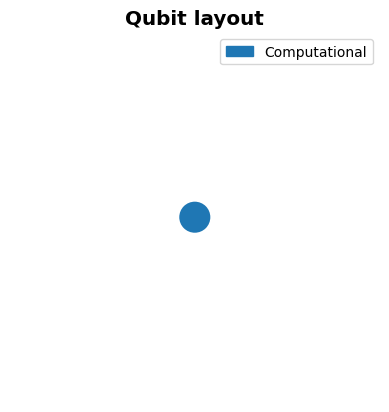

In [22]:
qubits.show_layout()

In [23]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, n_grad=10, max_count=100)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=69185
Iteration: 0 
            Max gradient term: 0.08902473500466135 
            Current gradient: [0.         0.01330836 0.0581271  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05571588 0.         0.         0.
 0.         0.         0.         0.         0.08902474 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.087035   0.
 0.         0.         0.         0.        ] 
            Current error: 0.3615625582088433 
            Current sigma values: (0, 1, 10)
Iteration: 10 
            Max gradient term: 0.00010347234339514967 
            Current gradient: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.11850890e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [24]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [25]:
theta_opt

array([0.97982095, 0.80884989, 0.2422916 , 1.        , 0.99755871,
       1.0445775 , 0.93605972, 1.        , 0.99985531, 0.70649907,
       1.08737361, 1.        , 0.99451304, 1.13343653, 0.46184978,
       1.        , 0.81972799, 1.21370611, 1.06786776, 1.        ,
       0.99504246, 1.09836204, 0.12365593, 1.        , 1.04450414,
       1.0136228 , 0.98739474, 1.        , 1.07798427, 0.95957253,
       1.00244424, 1.        , 1.08728953, 1.0386096 , 0.12466757,
       1.        , 0.99416797, 1.        , 0.99991981, 1.        ])

In [26]:
from q_channel_approx.unitary_circuits import unitary_circuit_fac

In [27]:
ham = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)(theta_opt)
import qutip as qt
qt.Qobj(ham)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[-9.99199933e-01-7.65002275e-06j -1.94383494e-06+3.99936667e-02j]
 [ 1.94383494e-06+3.99936667e-02j -9.99199933e-01+7.65002275e-06j]]

In [28]:
ham.dot(ham.conj().T) # check if unitary

array([[ 1.00000000e+00+0.00000000e+00j, -3.11998408e-16-2.98372438e-16j],
       [-3.11998408e-16+2.98372438e-16j,  1.00000000e+00+0.00000000e+00j]])

In [38]:
ham 
# ham / (ham[0,0] / np.abs(ham[0,0]))

array([[-9.99199933e-01-7.65002275e-06j, -1.94383494e-06+3.99936667e-02j],
       [ 1.94383494e-06+3.99936667e-02j, -9.99199933e-01+7.65002275e-06j]])

In [30]:
rhoaa = np.array([[1/2, -0.5j],[0.5j, 1/2]])
ham @ rhoaa @ np.conj(ham).T

array([[5.39961669e-01-4.23516474e-22j, 7.56616114e-06-4.98400507e-01j],
       [7.56616114e-06+4.98400507e-01j, 4.60038331e-01+0.00000000e+00j]])

In [31]:
from q_channel_approx.physics_defns import create_hamiltonian
h = create_hamiltonian(system).full()
import scipy as sc
h_ = sc.linalg.expm((-1j) * 0.1 * h)

In [32]:
qt.Qobj(ham)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[-9.99199933e-01-7.65002275e-06j -1.94383494e-06+3.99936667e-02j]
 [ 1.94383494e-06+3.99936667e-02j -9.99199933e-01+7.65002275e-06j]]

In [33]:
h_

array([[0.99920011+0.j        , 0.        -0.03998933j],
       [0.        -0.03998933j, 0.99920011+0.j        ]])

In [34]:
h_ @ rhoaa @ np.conj(h_).T

array([[0.53995735+0.j        , 0.        -0.49840085j],
       [0.        +0.49840085j, 0.46004265+0.j        ]])

In [35]:
h

array([[0. +0.j, 0.4+0.j],
       [0.4+0.j, 0. +0.j]])

rho_rand_haar: seed=27143


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

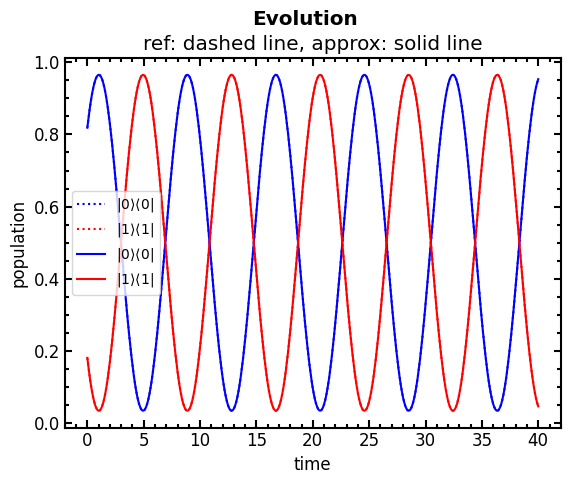

In [36]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(400, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=400, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

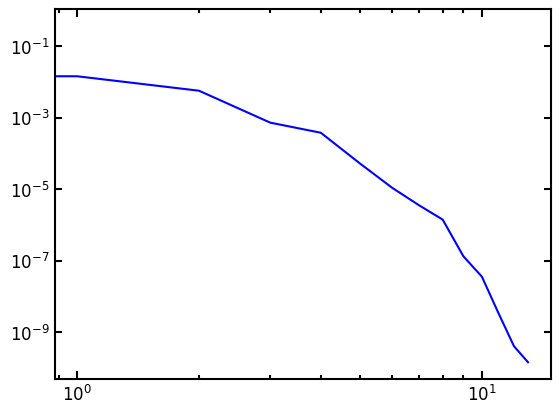

In [37]:
plt.loglog(errors)